In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv('train.csv').values
label = data[:,0]
data = data[:,1:]

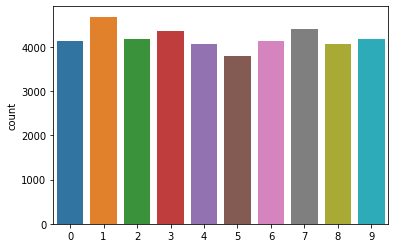

In [3]:
g = sns.countplot(label)

In [4]:
data.shape

(42000, 784)

In [5]:
train_data = data[:35000,:]
valid_data = data[35000:,:]

train_data = train_data.reshape(train_data.shape[0], 1, 28, 28).astype('float32')
valid_data = valid_data.reshape(valid_data.shape[0], 1, 28, 28).astype('float32')

train_data = train_data/255
valid_data = valid_data/255

train_label = label[:35000]
valid_label = label[35000:]

train_label = np_utils.to_categorical(train_label)
valid_label = np_utils.to_categorical(valid_label)

In [6]:
print("train_data shape: ",train_data.shape)
print("train_label shape: ",train_label.shape)
print("valid_data shape: ",valid_data.shape)
print("valid_label shape: ",valid_label.shape)

train_data shape:  (35000, 1, 28, 28)
train_label shape:  (35000, 10)
valid_data shape:  (7000, 1, 28, 28)
valid_label shape:  (7000, 10)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [8]:
def create_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape=(1, 28, 28), activation='relu',data_format='channels_first'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
# build the model
model = create_model()
# Fit the model
model.fit(train_data, train_label, validation_data=(valid_data, valid_label),epochs=10, batch_size=100, verbose=2)

Train on 35000 samples, validate on 7000 samples
Epoch 1/10
 - 56s - loss: 0.2716 - accuracy: 0.9200 - val_loss: 0.1010 - val_accuracy: 0.9683
Epoch 2/10
 - 56s - loss: 0.0871 - accuracy: 0.9741 - val_loss: 0.0688 - val_accuracy: 0.9790
Epoch 3/10
 - 56s - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0581 - val_accuracy: 0.9806
Epoch 4/10
 - 55s - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.0512 - val_accuracy: 0.9837
Epoch 5/10
 - 56s - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0536 - val_accuracy: 0.9841
Epoch 6/10
 - 59s - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0553 - val_accuracy: 0.9844
Epoch 7/10
 - 58s - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0531 - val_accuracy: 0.9841
Epoch 8/10
 - 59s - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0449 - val_accuracy: 0.9867
Epoch 9/10
 - 68s - loss: 0.0152 - accuracy: 0.9948 - val_loss: 0.0495 - val_accuracy: 0.9867
Epoch 10/10
 - 68s - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.0533 - val_accuracy: 0.9853


In [10]:
scores = model.evaluate(valid_data, valid_label, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.47%


In [11]:
model.save("model.h5")
print("model weights saved in model.h5 file")

model weights saved in model.h5 file


In [12]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("model saved as model.json file")

model saved as model.json file
